# Facebook data analysis 
#### by Rajesh Karedla

## Contents

- 1. [Problem Statement](#section1)</br>
    - 1.1. [Importing packages](#section101)</br>
    - 1.2. [Importing data set](#section102)</br>
- 2. [Exploratory data analysis](#section2)</br>
    - 2.1.[Preliminary statistics](#section201)</br>
    - 2.2 [Feature engineering](#section202)</br>
    - 2.3.[Data analysis](#section203)</br>
- 3. [Clustering](#section3)</br>
- 4. [Conclusions](#section4)</br>
- 5. [Actionable insights](#section5)</br>

<a id=section1></a> 
## 1. Problem Statement
Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status, thoughts and pictures with their friends. With the mobile app, it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes. We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group, gender etc.

<a id=section101></a>
### 1.1. Importing packages

In [77]:
# Importing required libraries
import numpy as np                                                
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                   
import seaborn as sns                                              
%matplotlib inline
sns.set()

from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import pylab as pl

<a id=section102></a>
### 1.1. Importing data set

In [2]:
# Importing data set
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section2></a> 
## 2. Exploratory data analysis

<a id=section201></a>
### 2.1. Preliminary statistics

In [4]:
# Checking null values and data types
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

Gender and tenure have missing values

In [5]:
# Checking descriptive statistics of data
facebook_df.describe(include='all')

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,98828,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,58574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,NaN,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,NaN,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,NaN,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,NaN,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,NaN,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000


Tenure, friend count, frenships initiated, all types of likes and likes received have extreem values as 75 percentile<br>
and max values are very far away.<br>
Mean is greated than mediam values for all variables which indicate that they are left skewed.

In [6]:
# Data profiling before preprocessing
# profile = pandas_profiling.ProfileReport(facebook_df)
# profile.to_file("facebook_before_preprocessing.html")

Numeric variables -14<br>
Categorical variables -1<br>
Missing values - 177<br>
Duplicate rows - 0<br>

userid is highly cardinal<br>
Age and dob_year are highly correlated<br>
Likes_received is highly correlated with mobile_likes_received and www_likes_received<br>

gender is balanced with 175 missing values<br>
tenure have 2 missing value and 70 zeros<br>
friend_count have no missing values but have 1962(2%) zeros<br>
friendships_initiated have no missing values but have 2997(3%) zeros<br>
likes have no missing values but have 22308(22.5%) zeros<br>
likes_received have no missing values but have 24428(24.7%) zeros<br>
mobile_likes have no missing values but have 35056(35.4%) zeros<br>
mobile_likes_received have no missing values but have 30003 zeros(30.3%)<br>
www_likes have no missing values but have 60999 zeros(61.6%)<br>
www_likes_received have no missing values but have 36864 zeros(37.2%)

<a id=section202></a>
### 2.2. Feature engineering

In [7]:
# Checking for null values in columns
facebook_df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [8]:
# Imputing null values with mode and median of the columns
facebook_df.gender.fillna('male', inplace=True)
facebook_df.tenure.fillna(412, inplace=True)
facebook_df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [10]:
# Checking if likes is a combination of mobile_likes and www_likes
(facebook_df['likes'] == (facebook_df['mobile_likes'] + facebook_df['www_likes'])).all()

False

In [11]:
# Checking for rows which are not combination of mobile_likes and www_likes
(facebook_df['likes'] == (facebook_df['mobile_likes'] + facebook_df['www_likes'])).describe()

count     99003
unique        2
top        True
freq      98998
dtype: object

There are only 5 rows where likes are not equal to combination of mobile_likes and www_likes hence can be considered as outliers and removed 

In [12]:
# Removing outliers
facebook_df = facebook_df[(facebook_df['likes'] == (facebook_df['mobile_likes'] + facebook_df['www_likes']))]
facebook_df.shape  

(98998, 15)

In [13]:
# Checking if likes is a combination of mobile_likes and www_likes
(facebook_df['likes'] == (facebook_df['mobile_likes'] + facebook_df['www_likes'])).all()

True

In [14]:
# Checking if likes_received is a combination of mobile_likes_received and www_likes_received
(facebook_df['likes_received'] == (facebook_df['mobile_likes_received'] + facebook_df['www_likes_received'])).all()

False

In [15]:
# Checking for rows which are not combination of mobile_likes and www_likes
(facebook_df['likes_received'] == (facebook_df['mobile_likes_received'] + facebook_df['www_likes_received'])).describe()

count     98998
unique        2
top        True
freq      98994
dtype: object

There are only 4 rows where likes_received are not equal to combination of mobile_likes_received and www_likes_received<br>
hence can be considered as outliers and removed 

In [16]:
# Removing outliers
facebook_df = facebook_df[(facebook_df['likes_received'] == (facebook_df['mobile_likes_received'] + facebook_df['www_likes_received']))]
facebook_df.shape

(98994, 15)

In [17]:
# Checking if likes_received is a combination of mobile_likes_received and www_likes_received
(facebook_df['likes_received'] == (facebook_df['mobile_likes_received'] + facebook_df['www_likes_received'])).all()

True

In [18]:
# Removing the columns where there are only zeros
facebook_df = facebook_df[~((facebook_df['friend_count']==0) & (facebook_df['friendships_initiated']==0) & 
                          (facebook_df['likes']==0) & (facebook_df['likes_received']==0))]
facebook_df.shape

(97330, 15)

In [4]:
((98994-97330)/98004)*100

1.6978898820456307

1.7% users on facebook does not have any friends or friedships inititated or likes or likes received.<br>
Droped all rows where friend count, friendships initiated, likes and likes_received, all are zeroes as they do not add value to our analysis

In [19]:
# Dropping columns which are not usefull
facebook_df.drop(['userid', 'dob_day', 'dob_month', 'dob_year'], axis=1, inplace=True)

In [20]:
# Descriptive statistics after data manupulation
facebook_df.describe(include='all')

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,97330.000000,97330,97330.000000,97330.000000,97330.000000,97330.000000,97330.000000,97330.000000,97330.000000,97330.000000,97330.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,57500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.377016,NaN,542.692705,199.602373,109.237429,158.578249,144.812792,107.798336,85.353313,50.779914,59.459478
std,22.695000,NaN,458.773430,389.278398,189.667918,576.360457,1398.424396,448.445186,846.275355,287.863232,606.010855
min,13.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,230.000000,33.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,NaN,416.000000,85.000000,47.000000,12.000000,9.000000,4.000000,5.000000,0.000000,2.000000
75%,50.000000,NaN,680.000000,209.000000,119.000000,84.000000,61.000000,48.000000,34.000000,7.000000,21.000000


In [21]:
# Data profiling after pre processing
# profile = pandas_profiling.ProfileReport(facebook_df)
# profile.to_file("facebook_after_preprocessing.html")

<a id=section203></a>
### 2.3. Data analysis

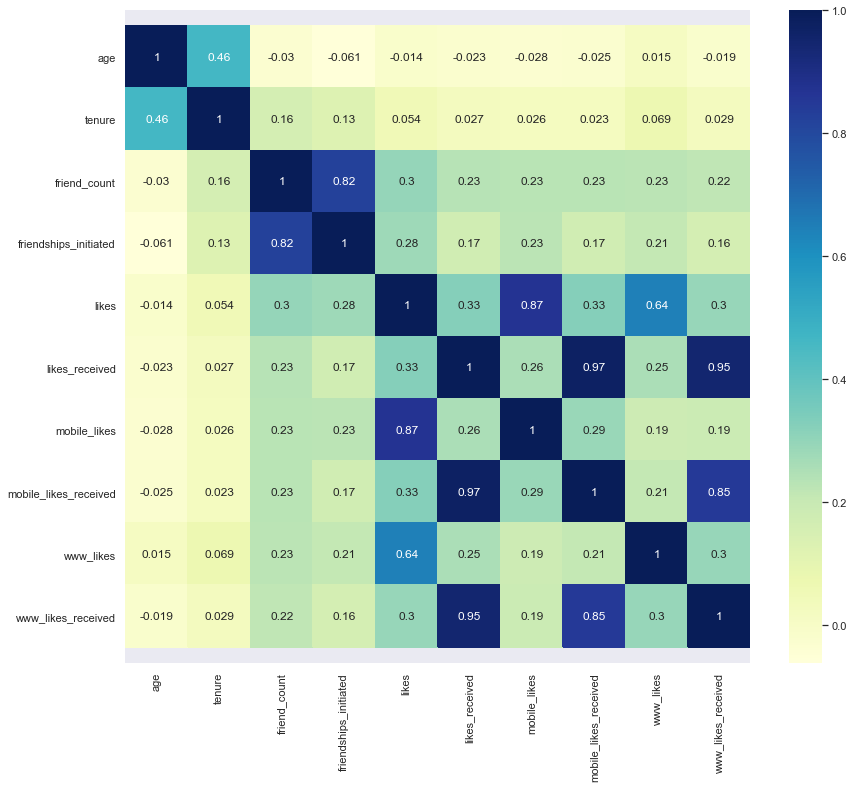

In [23]:
# Let us understand the correlation between variables
plt.figure(figsize=(14,12))                                # Size of graph
ax = sns.heatmap(facebook_df.corr(),annot=True,cmap="YlGnBu")  # Heat map of Correlation matrix
bottom, top = ax.get_ylim()                                
ax.set_ylim(bottom + 0.25, top - 0.25)
plt.show()

friend count and frienships initiated are highly correlated<br>
likes are highly correlated with mobile likes<br>
likes received is highly correlated with mobile likes received and www likes received

In [24]:
# Grouping the age column
facebook_df['age_group'] = ['below 30' if (x <= 30) else '30-50' if (x >= 31) & (x <= 50)
                            else '50-70' if (x >= 51) & (x <= 70) else '70+' for x in facebook_df['age']]
facebook_df

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
39,14,male,111.0,0,0,0,1,0,0,0,1,below 30
217,18,male,6.0,0,0,0,2,0,0,0,2,below 30
235,18,male,380.0,0,0,0,3,0,3,0,0,below 30
243,18,male,15.0,0,0,0,1,0,0,0,1,below 30
280,19,male,263.0,0,0,0,1,0,1,0,0,below 30
...,...,...,...,...,...,...,...,...,...,...,...,...
98998,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,50-70
98999,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,below 30
99000,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,below 30
99001,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,below 30


In [25]:
# Understanding the age groups
facebook_df['age_group'].value_counts()

below 30    52425
30-50       20952
50-70       16008
70+          7945
Name: age_group, dtype: int64

In [26]:
52425/(52425+20952+16008+7945)

0.5386314599815062

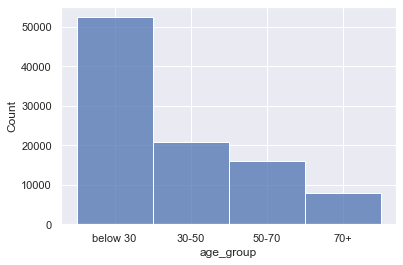

In [27]:
# Plotting the count of facebook users in all age groups
sns.histplot(facebook_df['age_group'])

54% of facebook users are below 30 years of age

In [28]:
# Undestanding the gender column
facebook_df.gender.value_counts()

male      57500
female    39830
Name: gender, dtype: int64

In [75]:
print("Male :", 57500/(57500+39830))
print("Female :", 39830/(57500+39830))

Male : 0.5907736566320765
Female : 0.4092263433679236


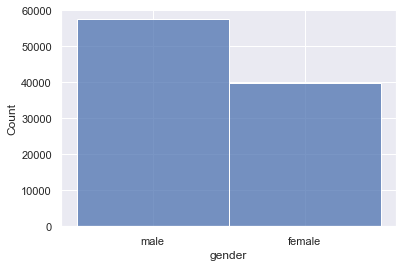

In [29]:
# Plotting the gender counts
sns.histplot(facebook_df['gender'])

60% of facebook users are male and 40% are female

In [30]:
# Undestanding the gender distribution across age groups 
facebook_df.groupby('age_group')['gender'].value_counts()

age_group  gender
30-50      male      12451
           female     8501
50-70      female     8546
           male       7462
70+        male       4406
           female     3539
below 30   male      33181
           female    19244
Name: gender, dtype: int64

Male facebook users are more in all age groups except 50-70 age group

In [31]:
# List of columns
facebook_df.columns

Index(['age', 'gender', 'tenure', 'friend_count', 'friendships_initiated',
       'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received', 'age_group'],
      dtype='object')

In [32]:
# Making a list of required columns
columns = ['tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes',
           'mobile_likes_received', 'www_likes', 'www_likes_received']

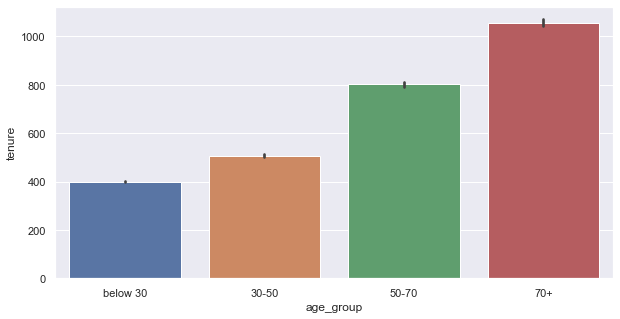

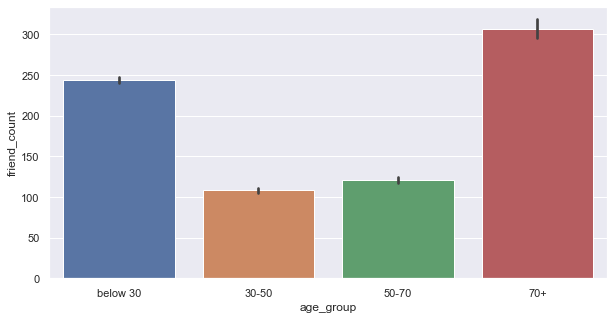

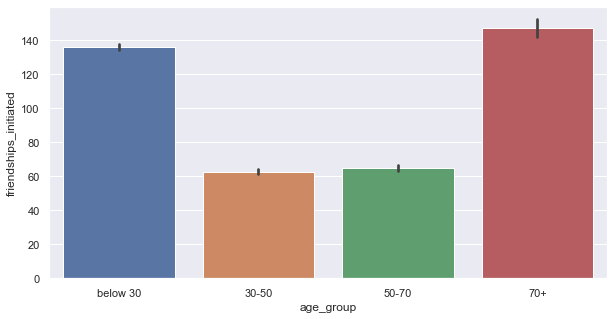

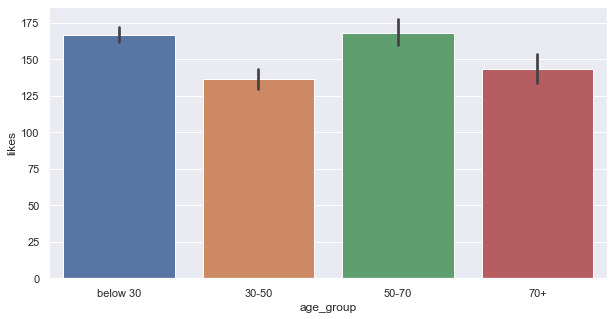

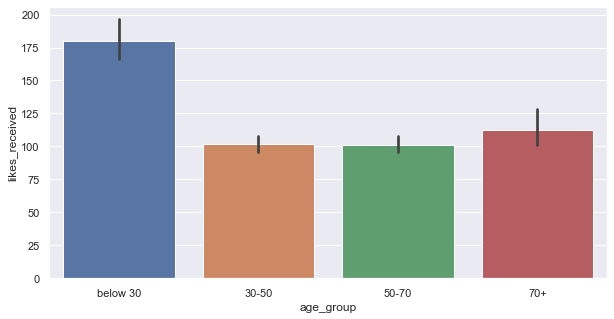

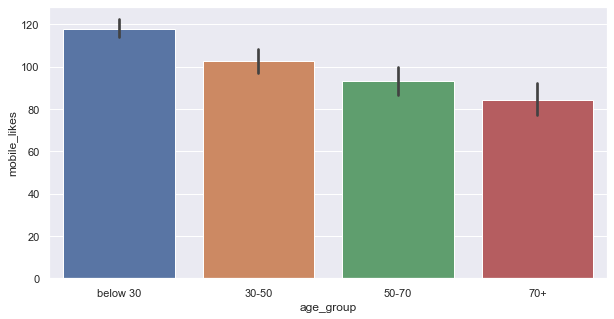

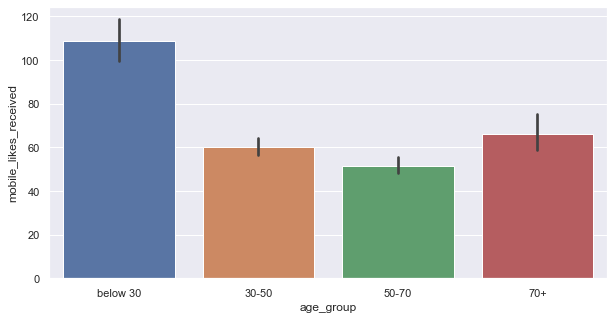

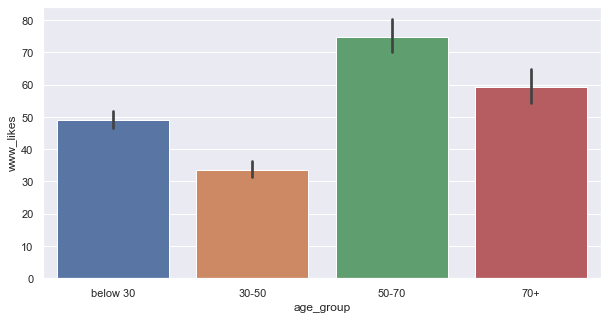

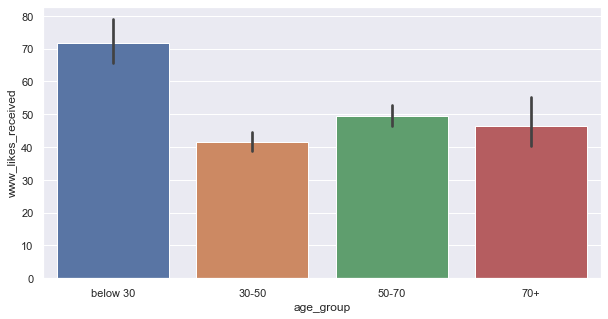

In [33]:
# Understanding the age groups with respect to other variables
for column in columns:
    plt.figure(figsize=(10,5))
    sns.barplot(data =facebook_df, x='age_group', y=column)

Average tenure is increasing with age<br>
70+ age group has the most average friend count followed by below 30 years age group<br>
70+ age group has highest average friedships initiated followed by below 30 years age grop<br>
All age groups have 135-165 average likes<br>
Average likes received by below 30 years age group is far more than other age groups<br>
Average mobile likes decreases with increase in age<br>
Below 30 years age groups has most average mobile likes received<br>
Age group 50-70 years have most average www likes followed by 70+ age group<br>
Below 30 years age group has the most www likes received

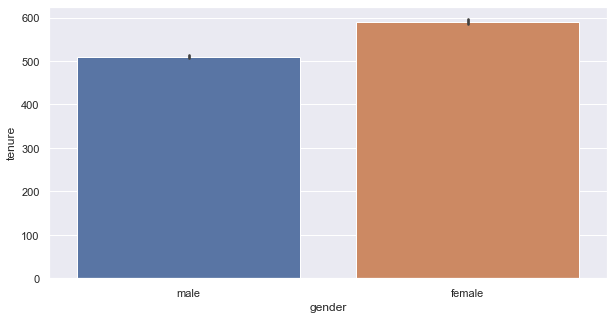

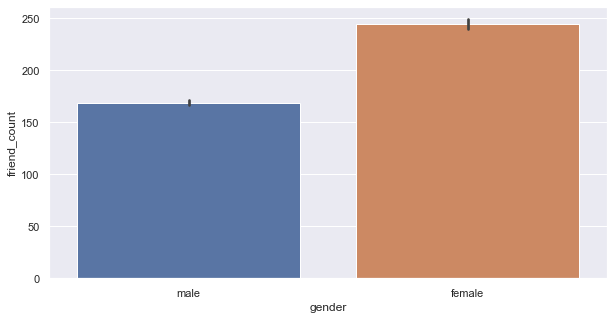

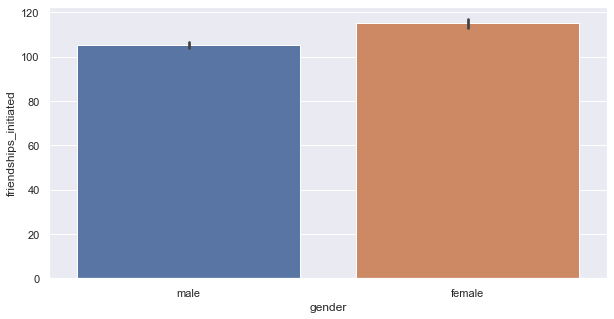

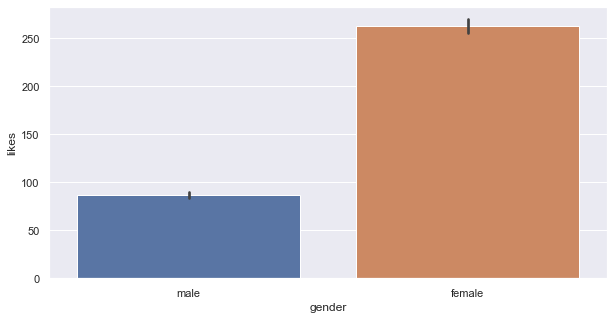

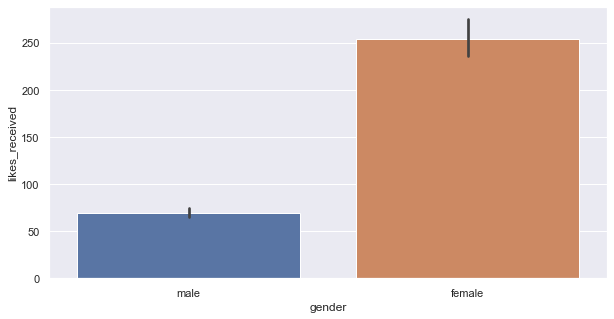

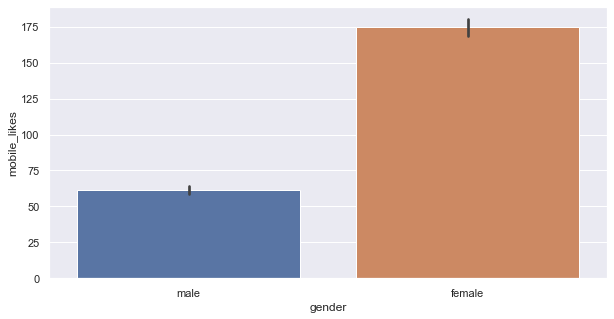

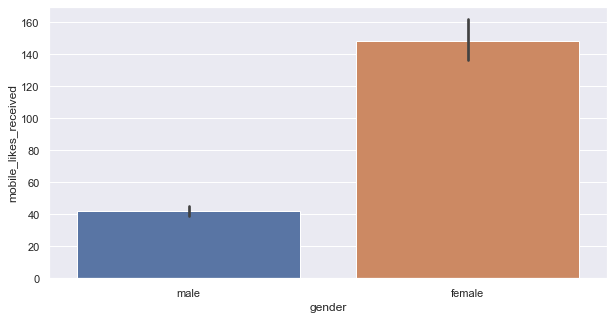

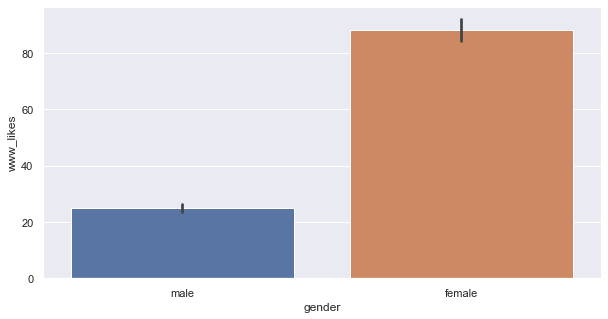

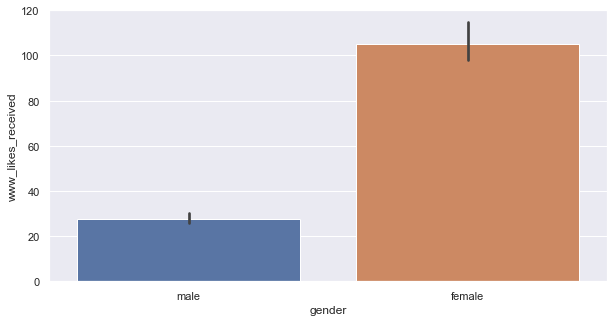

In [34]:
# Understanding gender behaviour with respect to remaining variables
for column in columns:
    plt.figure(figsize=(10,5))
    sns.barplot(data =facebook_df, x='gender', y=column)

Femals have the most averahe tenure, friend count, friedships initiated, likes, likes received, mobile likes,<br>
mobile likes received, www likes and www likes received.

<a id=section3></a> 
## 3. Clustering

In [35]:
# One-Hot encoding gender column
facebook_df = pd.get_dummies(facebook_df, columns=['gender'], drop_first=True)
facebook_df

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,gender_male
39,14,111.0,0,0,0,1,0,0,0,1,below 30,1
217,18,6.0,0,0,0,2,0,0,0,2,below 30,1
235,18,380.0,0,0,0,3,0,3,0,0,below 30,1
243,18,15.0,0,0,0,1,0,0,0,1,below 30,1
280,19,263.0,0,0,0,1,0,1,0,0,below 30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98998,68,541.0,2118,341,3996,18089,3505,11887,491,6202,50-70,0
98999,18,21.0,1968,1720,4401,13412,4399,10592,2,2820,below 30,0
99000,15,111.0,2002,1524,11959,12554,11959,11462,0,1092,below 30,0
99001,23,416.0,2560,185,4506,6516,4506,5760,0,756,below 30,0


In [36]:
# Droping age groups
facebook_df.drop('age_group', axis=1, inplace=True)

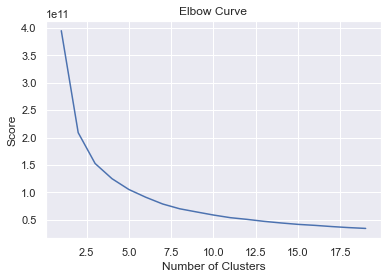

In [37]:
# Plotting to understand the number of clusters
number_of_clusters = range(1,20)

kmeans = [KMeans(n_clusters=i, max_iter=1000, random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(facebook_df).score(facebook_df) for i in range(len(kmeans))]

pl.plot((number_of_clusters), score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve suggests that there are 5 clusters in the data

In [38]:
# Assigning clusters to data
k_means_test = KMeans(n_clusters=5, max_iter=1000, random_state=42)

-1*k_means_test.fit(facebook_df).score(facebook_df)

facebook_df['cluster'] = k_means_test.labels_
facebook_df

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,cluster
39,14,111.0,0,0,0,1,0,0,0,1,1,0
217,18,6.0,0,0,0,2,0,0,0,2,1,0
235,18,380.0,0,0,0,3,0,3,0,0,1,0
243,18,15.0,0,0,0,1,0,0,0,1,1,0
280,19,263.0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98998,68,541.0,2118,341,3996,18089,3505,11887,491,6202,0,4
98999,18,21.0,1968,1720,4401,13412,4399,10592,2,2820,0,4
99000,15,111.0,2002,1524,11959,12554,11959,11462,0,1092,0,4
99001,23,416.0,2560,185,4506,6516,4506,5760,0,756,0,4


In [39]:
# Checking the size of clusters
size_of_each_cluster = facebook_df.groupby('cluster').size().reset_index()
size_of_each_cluster.columns = ['cluster', 'number_of_points']
size_of_each_cluster['percentage'] = size_of_each_cluster['number_of_points']/np.sum(size_of_each_cluster['number_of_points'])

print(size_of_each_cluster)

   cluster  number_of_points  percentage
0        0             93460    0.960238
1        1                 3    0.000031
2        2                 8    0.000082
3        3              3589    0.036875
4        4               270    0.002774


The percentage of data in cluster1, cluster2 and cluster4 are too low to be considered for analysis.

In [40]:
# Creating a separate dataframe with cluster 0
cluster0 = facebook_df[facebook_df['cluster'] ==0]
cluster0

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,cluster
39,14,111.0,0,0,0,1,0,0,0,1,1,0
217,18,6.0,0,0,0,2,0,0,0,2,1,0
235,18,380.0,0,0,0,3,0,3,0,0,1,0
243,18,15.0,0,0,0,1,0,0,0,1,1,0
280,19,263.0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98556,17,911.0,1999,1135,599,393,72,230,527,163,0,0
98581,41,1137.0,2020,123,655,276,576,170,79,106,0,0
98590,58,579.0,2119,994,699,345,0,62,699,283,0,0
98612,103,1487.0,1979,977,673,164,673,156,0,8,1,0


In [41]:
# Creating a separate dataframe with cluster 3
cluster3 = facebook_df[facebook_df['cluster'] ==3]
cluster3

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,cluster
3776,33,71.0,1,0,1580,1326,0,679,1580,647,1,3
3777,16,213.0,1,1,5937,320,5704,122,233,198,0,3
6503,20,779.0,4,2,3338,16,3272,8,66,8,0,3
7291,30,83.0,5,5,2741,2618,615,355,2126,2263,0,3
7292,52,249.0,5,4,2636,706,2636,381,0,325,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
98957,21,1269.0,2047,640,5155,4077,1770,2522,3385,1555,0,3
98976,18,445.0,1921,858,8719,584,8142,251,577,333,0,3
98977,17,716.0,3738,2060,4790,2475,4269,1716,521,759,0,3
98982,18,508.0,3917,1872,3664,3058,3228,2349,436,709,0,3


In [42]:
# Descriptive statistics of cluster0
cluster0.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,cluster
count,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.000000,93460.0
mean,37.551134,536.462979,162.748374,94.178558,79.295699,59.843120,54.455414,35.094169,24.840285,24.748951,0.604130,0.0
std,22.671897,455.286816,259.819035,147.799859,171.502008,135.101131,135.011164,84.364141,94.522917,66.615191,0.489039,0.0
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,21.000000,227.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,29.000000,411.000000,80.000000,45.000000,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000,1.000000,0.0
75%,50.000000,672.000000,192.000000,108.250000,66.000000,48.000000,37.000000,27.000000,5.000000,16.000000,1.000000,0.0
max,113.000000,3139.000000,4759.000000,2817.000000,1827.000000,1581.000000,1601.000000,1465.000000,1827.000000,1317.000000,1.000000,0.0


In [6]:
((93460)/98994)*100

94.40976220781057

This cluster which has 94.4% of all facebook users are with average activity i.e average frienships initiated, likes,<br>
likes received, mobile likes, mobile likes received, www likes and www likes received is less than 100

In [43]:
# Descriptive statistics of cluster3
cluster3.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,cluster
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.0
mean,33.550014,698.370020,1041.622179,456.414879,1737.307607,1467.565060,1178.913904,859.273892,558.393703,608.291167,0.270270,3.0
std,23.102000,518.832316,1137.062470,474.340019,1231.172490,1107.095131,1156.475915,748.795051,874.676797,613.706301,0.444161,0.0
min,13.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,18.000000,312.000000,259.000000,129.000000,929.000000,719.000000,324.000000,354.000000,1.000000,194.000000,0.000000,3.0
50%,23.000000,542.000000,618.000000,302.000000,1471.000000,1193.000000,900.000000,650.000000,181.000000,426.000000,0.000000,3.0
75%,45.000000,973.000000,1324.000000,616.000000,2190.000000,1904.000000,1653.000000,1138.000000,760.000000,808.000000,1.000000,3.0
max,113.000000,3128.000000,4923.000000,3654.000000,8888.000000,7297.000000,8888.000000,5369.000000,7424.000000,5672.000000,1.000000,3.0


In [7]:
(3589/98994)*100

3.6254722508434853

This cluster consists of only 3.6% of total facebook users but have friend count, likes, likes received, mobile likes<br>
mobile likes received, www likes and www likes received is more than 1000.

<a id=section4></a> 
## 4. Conclusions

1. Distribution of facebook users by gender:<br>
    Male   - 60%<br>
    Female - 40%<br>
2. 54% of facebook user are of below 30 age group.<br>
3. 70+ age group have the most friend count and frienships initiated.<br>
4. Below 30 years age group is more active on facebook with like, likes received, mobile likes and mobile likes received.<br>
4. 50-70 and 70+ age groups are more active with www likes.<br>
5. Female users are more active on all parameters compare to male users of facebook.<br>
6. There are 3 distinctive groups on facebook:<br>
    Inactive users - 1.7% of users are rigestered but do not have any friends or frienships initiated or likes or likes received<br>
    Normal users - 94.4% of userd have average likes less than 100(96%)<br>
    Hyper active users - 3.6% of users have average likes more than 1000(3.5%)<br>

<a id=section5></a> 
## 5. Actionable insights

1. Moblie version of facebook should be aligned to actract below 30 years age group.<br>
2. www version of facebook should be aligned towards the interests of 50+ age groups.<br>
3. Facebook should partner with hyper active users to increase the adoption of facebook by new users.